# Sentiment Analysis Pipeline

Script for NLP project.

## Config

In [ ]:
data_path = "train.csv"

## Imports

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.5 MB/s eta 0:00:00


In [ ]:
import gc
import numpy as np
import pandas as pd
import seaborn as sns
from torch import cuda
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertModel

## Read Data

In [ ]:
data = pd.read_csv(data_path)
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


## Describe Data

In [ ]:
data.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
80991,d8a630f61af99827,""", 9 December 2012 (UTC)\n\nI find it far from...",0,0,0,0,0,0
104688,300c7ed282c05071,So you think that because you'rve created a bu...,0,0,0,0,0,0
54633,920b4b973965e422,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
115882,6ba5ac42bfd01ef1,And I was referring to 1982 in any case.,0,0,0,0,0,0
62678,a7b80eadc400e159,Montana gold rush \n\nthere was a gold rush in...,0,0,0,0,0,0
59250,9ebd9d6d577064df,. Use your energy to address the problems that...,0,0,0,0,0,0
139342,e9c0ffbbc9c70574,Many thanks for your help. Your English is inf...,0,0,0,0,0,0
125057,9cf9503292b29f89,But Oi'm SOOOOOOOOOOOOOOOOOOOOOOOOOOOOO deprat...,0,0,0,0,0,0
85033,e38aa9df5a06a5f8,I don't care. Asshole!,1,0,1,0,0,0
112515,59e9d8693b3b7186,Please refer to my responses here and here: I ...,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Explore Data

In [ ]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0    144277
1     15294
Name: toxic, dtype: int64

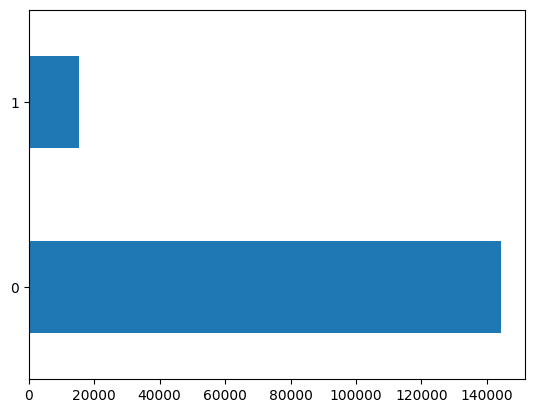

In [ ]:
data["toxic"].value_counts().plot(kind="barh")
data["toxic"].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

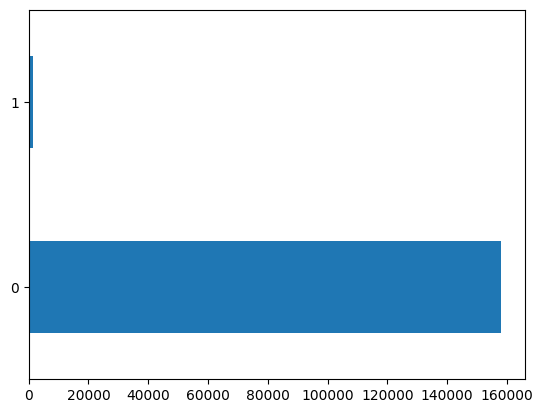

In [ ]:
data["severe_toxic"].value_counts().plot(kind="barh")
data["severe_toxic"].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

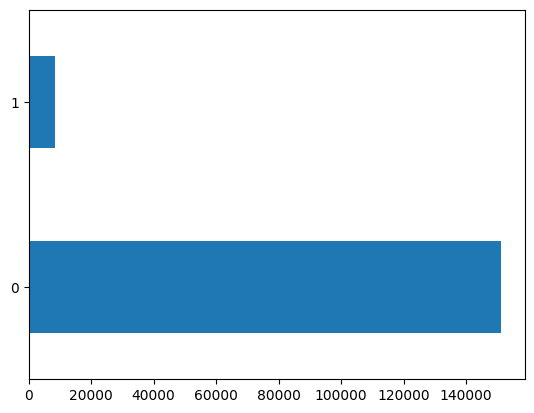

In [ ]:
data["obscene"].value_counts().plot(kind="barh")
data["obscene"].value_counts()

0    159093
1       478
Name: threat, dtype: int64

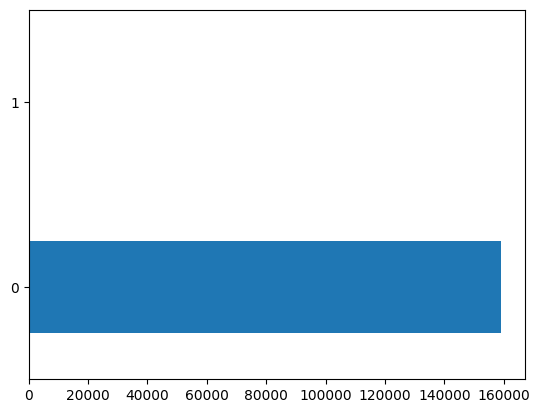

In [ ]:
data["threat"].value_counts().plot(kind="barh")
data["threat"].value_counts()

0    159093
1       478
Name: threat, dtype: int64

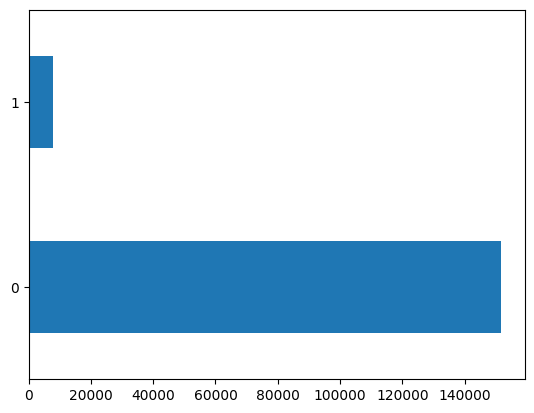

In [ ]:
data["insult"].value_counts().plot(kind="barh")
data["threat"].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

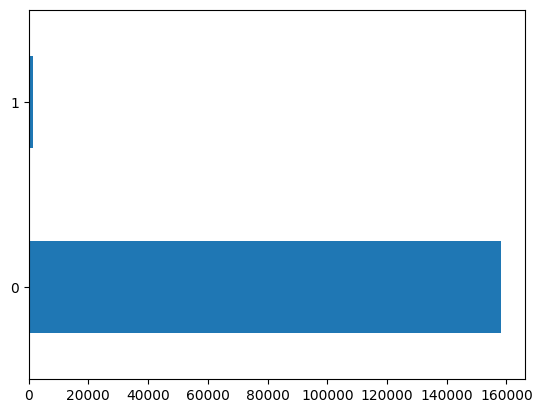

In [ ]:
data["identity_hate"].value_counts().plot(kind="barh")
data["identity_hate"].value_counts()

<Axes: >

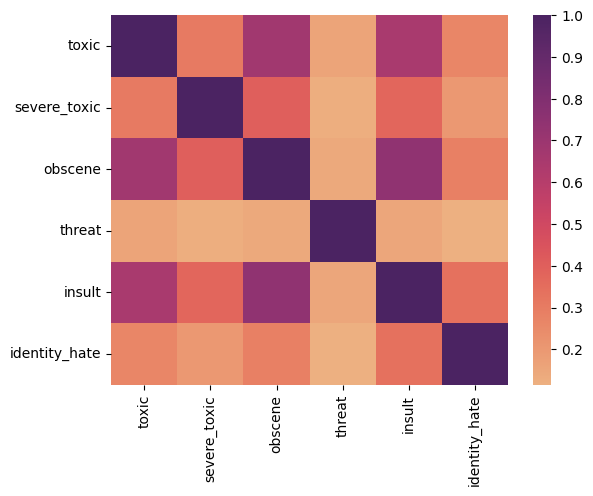

In [ ]:
sns.heatmap(data.corr(), cmap='flare')

## Verify Data Quality

In [ ]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

No null values - good.

## Preprocessing

### Merge Toxic Columns to Single One

In [ ]:
data = pd.concat([data["comment_text"], 
                  data.drop(
                      ["id", "comment_text"], axis=1
                  ).apply(lambda row: any(row), axis=1)], 
                 axis=1)
data

,comment_text,0
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
159566,""":::::And for the second time of asking, when ...",False
159567,You should be ashamed of yourself \n\nThat is ...,False
159568,"Spitzer \n\nUmm, theres no actual article for ...",False
159569,And it looks like it was actually you who put ...,False


### Balance Classes

In [ ]:
df_majority = data[data[0]==False]
df_minority = data[data[0]==True]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled[0].value_counts()

False    16225
True     16225
Name: 0, dtype: int64

In [ ]:
df_downsampled = df_downsampled.sample(frac=1)
df_downsampled

,comment_text,0
23010,Folic Acid is most important in the first few ...,False
34167,I'm coming to the conclusion that an RFC on Gd...,False
142480,Just a bunch of 2 inch gay fuckers slapping ea...,True
29181,"Hey Sas87, the article of the 20th has a photo...",False
25363,We need pictures! Why don't they dig it up?,False
...,...,...
38408,"""\nPlus, take a look! Have I made any outing ...",False
27896,YOURE SAD \n\nI love how people on here think ...,True
89651,You stupid dumb FU*K MY great great great grea...,True
123600,"""\nNo your wrong, EVula said it was about pers...",True


### Divide by Input and Target

In [ ]:
X = df_downsampled["comment_text"]
y = df_downsampled[0]
X

23010     Folic Acid is most important in the first few ...
34167     I'm coming to the conclusion that an RFC on Gd...
142480    Just a bunch of 2 inch gay fuckers slapping ea...
29181     Hey Sas87, the article of the 20th has a photo...
25363          We need pictures!  Why don't they dig it up?
                                ...                        
38408     "\nPlus, take a look! Have I made  any outing ...
27896     YOURE SAD \n\nI love how people on here think ...
89651     You stupid dumb FU*K MY great great great grea...
123600    "\nNo your wrong, EVula said it was about pers...
24355     YOU'RE A FUCKING LIAR WHO DOESN'T KNOW HOW TO ...
Name: comment_text, Length: 32450, dtype: object

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.1)

## Constructing a Model

### Encoder

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-multilingual-cased")
model = DistilBertModel.from_pretrained("distilbert-base-multilingual-cased")

device = "cuda:0" if cuda.is_available() else "cpu"
model = model.to(device)

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Embed input sentences

In [ ]:
# tokenize
X_train = X_train.apply(lambda row: tokenizer(row, return_tensors='pt', max_length=512).to(device))

In [ ]:
cuda.empty_cache()

In [ ]:
# embed
batch_size = 1
temp = X_train[:batch_size].apply(lambda row: model(**row).last_hidden_state)
for i in range(batch_size, len(X_train), batch_size):  # 14 sec / 1000 samples | 86 sec / 10k samples
    temp = np.vstack([temp, X_train[i:i+batch_size].apply(lambda row: model(**row).last_hidden_state)])
X_train = temp

OutOfMemoryError: ignored

In [ ]:
# cuda.empty_cache()
# gc.collect()

batch_size = 100
temp = X[:batch_size].apply(lambda row: get_features(row))
for i in range(batch_size, len(X_train), batch_size):  # 14 sec / 1000 samples | 86 sec / 10k samples
    temp = np.vstack([temp, X[i:i+batch_size].apply(lambda row: get_features(row))])
    cuda.empty_cache()
X_train = temp

### Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()

## Train

In [ ]:
clf.fit(X_train, y_train)

## Test

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))